# <font color='#d35400'> Lab 8 | Regression </font>
In this lab, we analyze a dataset called `mtcars`. The dataset comes from a 1974 issue of Motor Trend  US amagazine and contains fuel consumption and 10 aspects of automobile design and performance for 32 automobiles from 1973 to 1974. We perform exploratory data anlysis (EDA) on this dataset and then build a linear regression model.

<p align="center">
  <img src="chill_dog.jpg" alt="Alt Text", width="300"/>
</p>

## <font color = '#FF8C00'> Section 1 </font> | Loading the Data
In this section, we take the dataset in it's `.csv` format and convert it into a pandas data frame. We then standardize the features and characterize the dependent variable by plotting the ditribution over mpg and describe the range of values. 

- [x] Describe the original data and transformed data using head(), info(), and describe().
- [x] Standardize your features. You may do this ‘by hand’ or using StandardScaler from sklearn.preprocessing
- [x] Characterize the dependent variable – plot the distribution over mpg and describe the range of values

### <font color = '#FF8C00'> Converting `.csv` to Pandas Data Frame </font>
We start this section by taking in the `.csv` file and converting it into a pandas data frame. We then use `.head()`, `.info()` and `,describe()` to understand the dataset in better detail and look at the data types.

In [1]:
# importing pandas
import pandas as pd

# importing ipython display
from IPython.display import display

# converting .csv file to a pandas data frame
mountain_cars_df = pd.read_csv("C:/GitHub/DataScienceMachineLearning/wk_12/lab/mtcars.csv")

# renaming a column
mountain_cars_df = mountain_cars_df.rename(columns={'Unnamed: 0' : 'cars'})

# displaying the data frame
mountain_cars_df.head(5)

,cars,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [2]:
# displaying the information behind the data frame
display(mountain_cars_df.info())

# displaying the statistics behind the data frame
display(mountain_cars_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cars    32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


None

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


### <font color = '#FF8C00'> Converting Appropriate Features to Categorical </font>
Next, we look at the features and determine which ones are cetegorical and which ones aren't. The features are as follows:
- Categorical Features: `cyl`, `vs`, `am`, `gear` and `carb`
- Numerical Features: `mpg`, `disp`, `hp`, `drat`, `wt`, `qsec`

In [31]:
# grabbing all the categorical features
categorical_features = ['cyl', 'vs', 'am', 'gear', 'carb']

# setting the features as categorical data types
mountain_cars_df[categorical_features] = mountain_cars_df[categorical_features].astype('category')

# displaying the new information behind the data frame
display(mountain_cars_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   cars    32 non-null     object  
 1   mpg     32 non-null     float64 
 2   cyl     32 non-null     category
 3   disp    32 non-null     float64 
 4   hp      32 non-null     int64   
 5   drat    32 non-null     float64 
 6   wt      32 non-null     float64 
 7   qsec    32 non-null     float64 
 8   vs      32 non-null     category
 9   am      32 non-null     category
 10  gear    32 non-null     category
 11  carb    32 non-null     category
dtypes: category(5), float64(5), int64(1), object(1)
memory usage: 2.8+ KB


None

### <font color = '#FF8C00'> Standardizing the Features </font>
Next, we move on to standardizing the features. We achieve this using `StandardScaler`. After performing standardization, we then characterize the dependent variable by plotting the distribution over `mpg` and describing the range of values.

In [4]:
# importing the standard scaler library
from sklearn.preprocessing import StandardScaler

# filtering out the numeric columns
numerical_columns = mountain_cars_df.select_dtypes(include='number').columns

# initializing the standard scaler
scaler = StandardScaler()

# applying the standard scaler to the data frame
scaled_df = scaler.fit_transform(mountain_cars_df[numerical_columns])

# combining the data frames again
scaled_df = pd.DataFrame(scaled_df, columns=numerical_columns, index=mountain_cars_df.index)

# viewing the data frame
scaled_df.head(5)

,mpg,disp,hp,drat,wt,qsec
0,0.153299,-0.579750,-0.543655,0.576594,-0.620167,-0.789601
1,0.153299,-0.579750,-0.543655,0.576594,-0.355382,-0.471202
2,0.456737,-1.006026,-0.795570,0.481584,-0.931678,0.432823
3,0.220730,0.223615,-0.543655,-0.981576,-0.002336,0.904736
4,-0.234427,1.059772,0.419550,-0.848562,0.231297,-0.471202


In [7]:
# retrieving the object columns and combining them
non_numerical_columns = mountain_cars_df.select_dtypes(include=['object', 'category'])
new_mt_car_df = pd.concat([non_numerical_columns, scaled_df], axis=1)
new_mt_car_df = new_mt_car_df[mountain_cars_df.columns]

# viewing the scaled data frame
new_mt_car_df.head(5)

,cars,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,0.153299,6,-0.579750,-0.543655,0.576594,-0.620167,-0.789601,0,1,4,4
1,Mazda RX4 Wag,0.153299,6,-0.579750,-0.543655,0.576594,-0.355382,-0.471202,0,1,4,4
2,Datsun 710,0.456737,4,-1.006026,-0.795570,0.481584,-0.931678,0.432823,1,1,4,1
3,Hornet 4 Drive,0.220730,6,0.223615,-0.543655,-0.981576,-0.002336,0.904736,1,0,3,1
4,Hornet Sportabout,-0.234427,8,1.059772,0.419550,-0.848562,0.231297,-0.471202,0,0,3,2


### <font color = '#FF8C00'> Plotting the Distribution of `mpg` </font>
Lastly, we characterize tje dependent variable by plotting the distribution over mpg and describing the range of values.

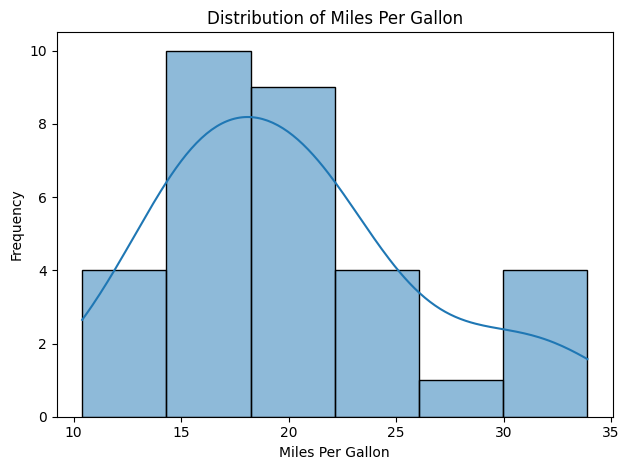

In [8]:
# importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# plotting out the histogram
sns.histplot(mountain_cars_df['mpg'], kde=True)
plt.title('Distribution of Miles Per Gallon')
plt.xlabel('Miles Per Gallon')
plt.ylabel('Frequency')
plt.tight_layout()

# saving the plot
plt.savefig('C:/GitHub/DataScienceMachineLearning/wk_12/plots/mpg.jpg', dpi=300)

# displaying the plot
plt.show()


## <font color = '#FF8C00'> Section 2 </font> | Exploratory Data Analysis
In this section, we work on exploring the relationships between each variable and mpg. We then use hypothesis testing to assess which variables show statistically significant association with the response variable. 
- [ ] Explore the relationships between each variable and mpg – choose the appropriate plots based on the variable types (e.g., categorical, numerical, ordered).
- [ ] Use hypothesis testing to assess which variables show statistically significant association with the response – use (α = 0.005).

### <font color = '#FF8C00'> Plotting Scatter Plots </font>
For comparing numerical features against numerical features, it would make the most sense to choose a scatter plot, as this would allow us to explore the relationship between two numerical features by looking at the best fit line. We start off by defining a function used to plot scatter plots and then move to plot them.

In [20]:
# function for plotting a sctter plot
def scatter_plot(feature_one, feature_two, dataframe, ax):
    sns.scatterplot(x=feature_one, y=feature_two, data=dataframe, ax=ax)
    ax.set_title(feature_one + " vs " + feature_two + " Scatterplot")
    ax.set_xlabel(feature_one)
    ax.set_ylabel(feature_two)

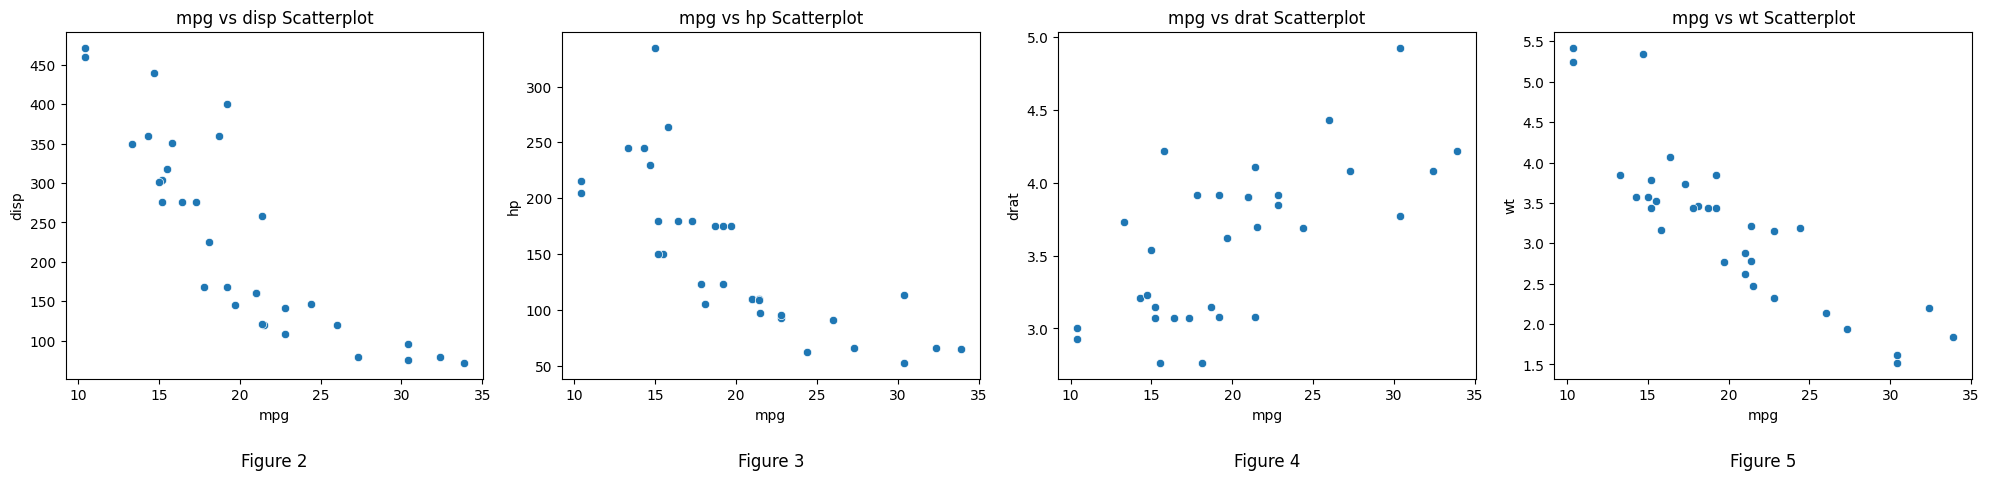

In [27]:
# setting the number of rows and columns
rows = 1
columns = 4

# creating the figure
fig, axes = plt.subplots(rows, columns, figsize=(20, 5)) 

# flatten the axes array
axes = axes.ravel()  

# setting a list of features of interest
numerical_features = ['disp', 'hp', 'drat', 'wt', 'qsec']


# using a for loop to greate the graph
for i, numerical_feature in enumerate(numerical_features):
    if i < len(axes):  
        scatter_plot('mpg', numerical_feature, mountain_cars_df,  axes[i])

        axes[i].text(
            0.5, -0.25,
            f"Figure {i+2}", 
            fontsize=12, 
            ha='center', 
            transform=axes[i].transAxes
        )

for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

# displaying the plots
plt.tight_layout()

# saving the plot
plt.savefig('C:/GitHub/DataScienceMachineLearning/wk_12/plots/mpgvsnumerical.jpg', dpi=300)

# displaying the plot
plt.show()

### <font color = '#FF8C00'> Plotting Violin Plots </font>
For comparing numerical features against categorical features, it would make the most sense to use a violin plot, as this would allow us to explore the relationship between the numerical and categorical features. We start off by defining a function used to plot violin plots and then move to plot them.

In [28]:
# function for plotting a sctter plot
def violin_plot(feature_one, feature_two, dataframe, ax):
    sns.violinplot(x=feature_one, y=feature_two, data=dataframe, ax=ax)
    ax.set_title(feature_one + " vs " + feature_two + " Scatterplot")
    ax.set_xlabel(feature_one)
    ax.set_ylabel(feature_two)

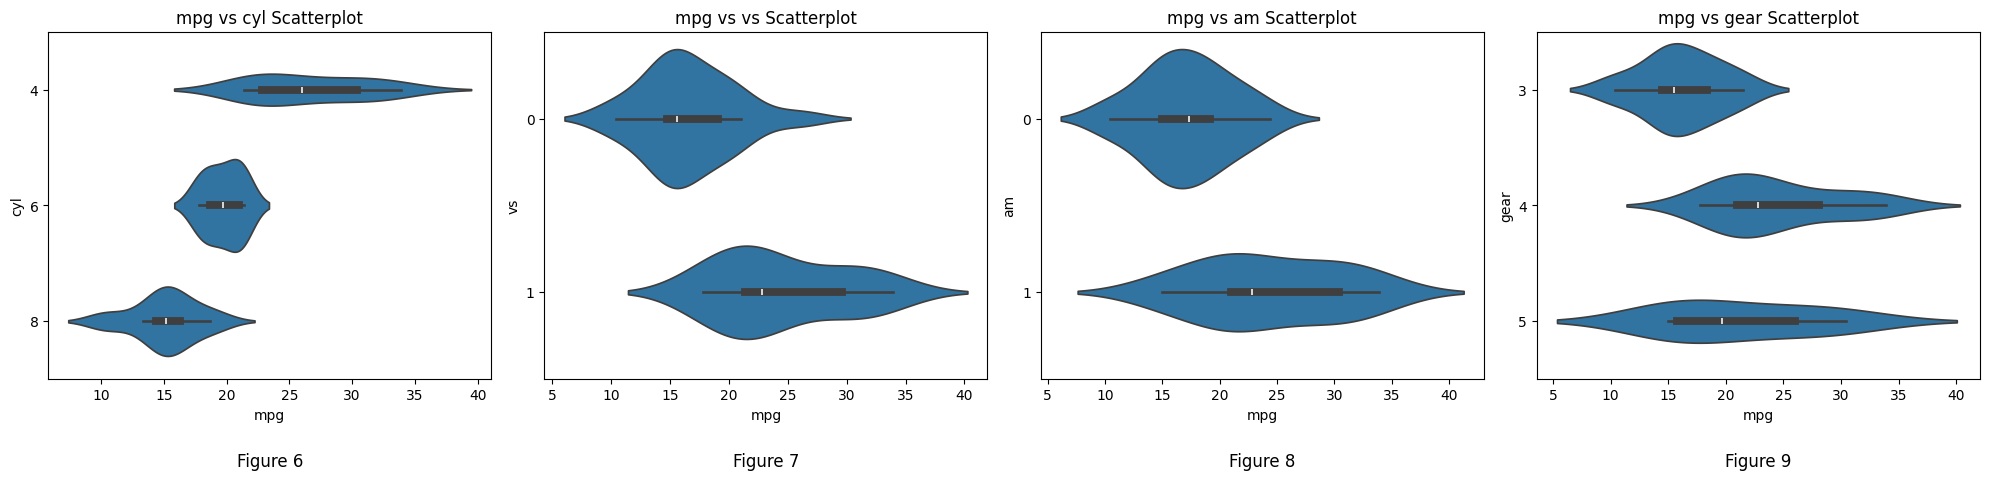

In [29]:
# setting the number of rows and columns
rows = 1
columns = 4

# creating the figure
fig, axes = plt.subplots(rows, columns, figsize=(20, 5)) 

# flatten the axes array
axes = axes.ravel()  

# setting a list of features of interest
categorical_features = ['cyl', 'vs', 'am', 'gear', 'carb']


# using a for loop to greate the graph
for i, categorical_feature in enumerate(categorical_features):
    if i < len(axes):  
        violin_plot('mpg', categorical_feature, mountain_cars_df,  axes[i])

        axes[i].text(
            0.5, -0.25,
            f"Figure {i+6}", 
            fontsize=12, 
            ha='center', 
            transform=axes[i].transAxes
        )

for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

# displaying the plots
plt.tight_layout()

# saving the plot
plt.savefig('C:/GitHub/DataScienceMachineLearning/wk_12/plots/mpgvscategorical.jpg', dpi=300)

# displaying the plot
plt.show()

### <font color = '#FF8C00'> Hypothesis Testing using Pearson's Correlation </font>
When it comes to hypothesis of numerical variables against each other, we decide on using pearson's correlation to measure the strength / direction of the linear relationship between two numerical variables.